In [1]:
#importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

###  Data Acquisition 

In [3]:
NYCSR=pd.read_csv(r"C:\Users\Aaqui\Desktop\Data Science\Data Science with python\Projects\DSWP Project 2- Customer service request analysis\311_Service_Requests_from_2010_to_Present.csv",low_memory=True)
NYCSR.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [4]:
NYCSR.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [3]:
type(NYCSR)

pandas.core.frame.DataFrame

### Exploratory Data Analysis 

In [4]:
NYCSR.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [5]:
NYCSR.isnull().any()

Unique Key                        False
Created Date                      False
Closed Date                        True
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                         True
Location Type                      True
Incident Zip                       True
Incident Address                   True
Street Name                        True
Cross Street 1                     True
Cross Street 2                     True
Intersection Street 1              True
Intersection Street 2              True
Address Type                       True
City                               True
Landmark                           True
Facility Type                      True
Status                            False
Due Date                           True
Resolution Description            False
Resolution Action Updated Date     True
Community Board                   False
Borough                           False


In [6]:
NYCSR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [7]:
NYCSR.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

### Here we have lots of null features, hence dropping them down to avoid any misleading results

In [8]:
#Dropping null columns
NYC=NYCSR.drop(['School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Garage Lot Name'],axis=1)
NYC.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [9]:
NYC.describe().T

,count,mean,std,min,25%,50%,75%,max
Unique Key,300698.0,3.130054e+07,573854.692971,3.027948e+07,3.080118e+07,3.130436e+07,3.178446e+07,3.231065e+07
Incident Zip,298083.0,1.084889e+04,583.182081,8.300000e+01,1.031000e+04,1.120800e+04,1.123800e+04,1.169700e+04
X Coordinate (State Plane),297158.0,1.004854e+06,21753.384466,9.133570e+05,9.919752e+05,1.003158e+06,1.018372e+06,1.067173e+06
Y Coordinate (State Plane),297158.0,2.037545e+05,29880.183529,1.212190e+05,1.833430e+05,2.011105e+05,2.241252e+05,2.718760e+05
Latitude,297158.0,4.072588e+01,0.082012,4.049913e+01,4.066980e+01,4.071866e+01,4.078184e+01,4.091287e+01
Longitude,297158.0,-7.392563e+01,0.078454,-7.425494e+01,-7.397214e+01,-7.393178e+01,-7.387680e+01,-7.370076e+01


In [10]:
# To cross check the null values
NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

### To check the city wise complaints 

In [11]:
# City wise Complaint Type
NYC.loc[:,['City','Complaint Type']]

,City,Complaint Type
0,NEW YORK,Noise - Street/Sidewalk
1,ASTORIA,Blocked Driveway
2,BRONX,Blocked Driveway
3,BRONX,Illegal Parking
4,ELMHURST,Illegal Parking
...,...,...
300693,NaN,Noise - Commercial
300694,RICHMOND HILL,Blocked Driveway
300695,BROOKLYN,Noise - Commercial
300696,BRONX,Noise - Commercial


In [12]:
NYC1=NYC.groupby(['City','Complaint Type'])
NYC1

In [ ]:
NYC1.plot.bar(figsize=(15,15),stacked=True).size().unstack().fillna(0)
plt.ylabel('Number of Complaints')
plt.title('City-wise Complaints')

In [13]:
NYC1.size().reset_index()

,City,Complaint Type,0
0,ARVERNE,Animal Abuse,38
1,ARVERNE,Blocked Driveway,35
2,ARVERNE,Derelict Vehicle,27
3,ARVERNE,Disorderly Youth,2
4,ARVERNE,Drinking,1
...,...,...,...
759,Woodside,Blocked Driveway,11
760,Woodside,Derelict Vehicle,2
761,Woodside,Illegal Parking,100
762,Woodside,Noise - Commercial,2


### Major Complaint Types 

In [14]:
MCNYC=NYC.loc[:,['Complaint Type']]
MCNYC

,Complaint Type
0,Noise - Street/Sidewalk
1,Blocked Driveway
2,Blocked Driveway
3,Illegal Parking
4,Illegal Parking
...,...
300693,Noise - Commercial
300694,Blocked Driveway
300695,Noise - Commercial
300696,Noise - Commercial


In [16]:
MCNYC.nunique()

Complaint Type    24
dtype: int64

In [19]:
# Top major Complaints
MCNYC.value_counts()

Complaint Type           
Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
dtype: int64

<AxesSubplot:title={'center':'Major Complaint Types'}, xlabel='Complaint Type'>

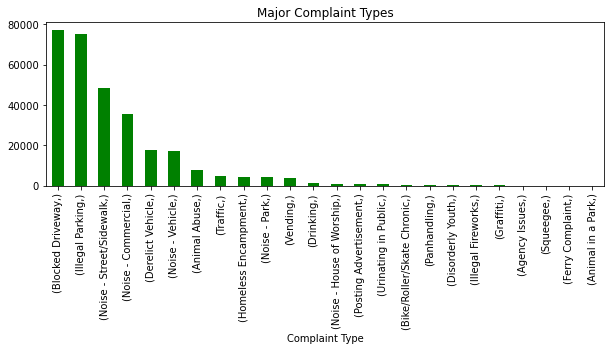

In [21]:
MCNYC.value_counts().plot(figsize=(10,3),kind='bar',title='Major Complaint Types',color='g')

In [23]:
MCNYC=NYC.dropna(subset=["Complaint Type"])
MCNYC=NYC.groupby("Complaint Type")

sortedMCNYCType = NYCMC.size().sort_values(ascending = False)
sortedMCNYCType = sortedMCNYCType.to_frame('count').reset_index()

sortedMCNYCType
#sortedNYCMCType.head(10)

,Complaint Type,count
0,Blocked Driveway,77044
1,Illegal Parking,75361
2,Noise - Street/Sidewalk,48612
3,Noise - Commercial,35577
4,Derelict Vehicle,17718
5,Noise - Vehicle,17083
6,Animal Abuse,7778
7,Traffic,4498
8,Homeless Encampment,4416
9,Noise - Park,4042


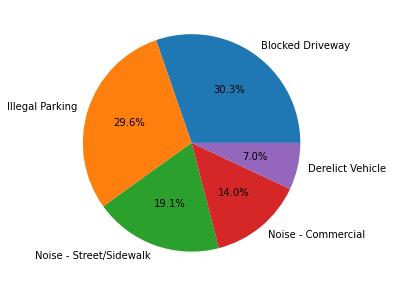

In [25]:
sortedMCNYCType = sortedMCNYCType.head()
plt.figure(figsize=(5,5))
plt.pie(sortedMCNYCType['count'],labels=sortedMCNYCType["Complaint Type"], autopct="%1.1f%%")
plt.show()

### Conclusion 1: Clearly major complaints  are from Transport department namely Blocked Driveway, Illegal Parking, Noise- Street/Sidewalk, Noise Commercial, Derelict Vehicle

In [92]:
#To check which city has major complaints
cityNYC=NYC['City'].value_counts()
cityNYC

Brooklyn               98295
New York               65972
Bronx                  40697
Staten Island          12338
Jamaica                 7294
Astoria                 7046
Flushing                5970
Ridgewood               5162
Corona                  4295
Woodside                3664
South Richmond Hill     2774
Ozone Park              2755
East Elmhurst           2747
Elmhurst                2673
Long Island City        2570
Woodhaven               2463
Maspeth                 2461
South Ozone Park        2173
Richmond Hill           1902
Fresh Meadows           1899
Queens Village          1814
Middle Village          1765
Forest Hills            1688
Jackson Heights         1688
Rego Park               1486
Bayside                 1221
College Point           1220
Far Rockaway            1179
Whitestone              1098
Hollis                  1012
Howard Beach             932
Rosedale                 922
Springfield Gardens      883
Saint Albans             834
Kew Gardens   

<AxesSubplot:title={'center':'City-wise major Complaints'}>

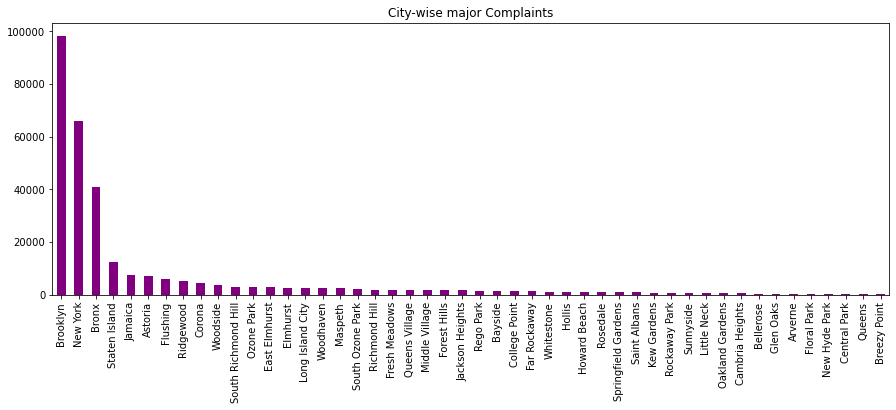

In [93]:
cityNYC.plot(figsize=(15,5),kind='bar',title='City-wise major Complaints',color='purple')

In [94]:
cityNYC=NYC.dropna(subset=["City"])
cityNYC=NYC.groupby("City")

sortedcityNYCType = cityNYC.size().sort_values(ascending = False)
sortedcityNYCType = sortedcityNYCType.to_frame('count').reset_index()

sortedcityNYCType
#sortedNYCMCType.head(10)

,City,count
0,Brooklyn,98295
1,New York,65972
2,Bronx,40697
3,Staten Island,12338
4,Jamaica,7294
5,Astoria,7046
6,Flushing,5970
7,Ridgewood,5162
8,Corona,4295
9,Woodside,3664


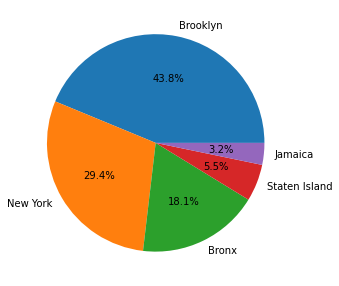

In [95]:
sortedcityNYCType = sortedcityNYCType.head()
plt.figure(figsize=(5,5))
plt.pie(sortedcityNYCType['count'],labels=sortedcityNYCType["City"], autopct="%1.1f%%")
plt.show()

### Conclusion 2: Major Complaint are from Brooklyn, New York, and Bronx 

### Apprently both major complaint types and top complaint city are rightly skewed

In [29]:
def title(city):
    try:
        city=city.title()
        return city
    except:
        return np.nan
NYC['City']=NYC['City'].apply(title)
NYC['City'].value_counts()

Brooklyn               98307
New York               65994
Bronx                  40702
Staten Island          12343
Jamaica                 7296
Astoria                 7047
Flushing                5971
Ridgewood               5163
Corona                  4295
Woodside                3664
South Richmond Hill     2774
Ozone Park              2755
East Elmhurst           2748
Elmhurst                2673
Long Island City        2571
Woodhaven               2464
Maspeth                 2462
South Ozone Park        2173
Richmond Hill           1904
Fresh Meadows           1899
Queens Village          1814
Middle Village          1765
Jackson Heights         1689
Forest Hills            1688
Rego Park               1486
Bayside                 1221
College Point           1220
Far Rockaway            1179
Whitestone              1098
Hollis                  1012
Howard Beach             932
Rosedale                 922
Springfield Gardens      883
Saint Albans             834
Kew Gardens   

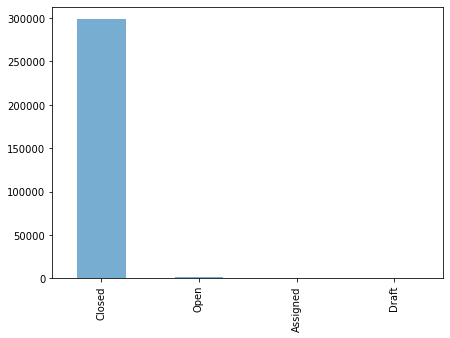

In [31]:
#Have a look at the status of tickets
NYC['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,5))
plt.show()

### Conclusion 3: Almost 98% of the tickets are closed

In [32]:
NYC.loc[:,['Created Date','Closed Date']]

,Created Date,Closed Date
0,12/31/2015 11:59:45 PM,01-01-16 0:55
1,12/31/2015 11:59:44 PM,01-01-16 1:26
2,12/31/2015 11:59:29 PM,01-01-16 4:51
3,12/31/2015 11:57:46 PM,01-01-16 7:43
4,12/31/2015 11:56:58 PM,01-01-16 3:24
...,...,...
300693,03/29/2015 12:33:41 AM,NaN
300694,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM
300695,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM
300696,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM


In [33]:
# Change the Date Columns to YYYY-MM-DD
NYC['Created Date']=pd.to_datetime(NYC['Created Date'])
NYC['Closed Date']=pd.to_datetime(NYC['Closed Date'])

In [34]:
# To check whether the date are in correct order
NYC.loc[NYC['Created Date']>=NYC['Closed Date']].shape

(0, 48)

In [50]:
# Dropping the empty Created and Closed Dates
NYC=NYC[NYC['Created Date'].notnull()]
NYC=NYC[NYC['Closed Date'].notnull()]

### Adding Feature Column of Request Closing Time

In [54]:
NYC['Request_Closing_Time']=NYC['Closed Date'].values-NYC['Created Date'].values
NYC['Request_Closing_Time_min']=NYC['Request_Closing_Time']/np.timedelta64(1,'m')
NYC.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_min
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,55.250000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,86.266667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,291.516667


<AxesSubplot:xlabel='Request_Closing_Time', ylabel='Density'>

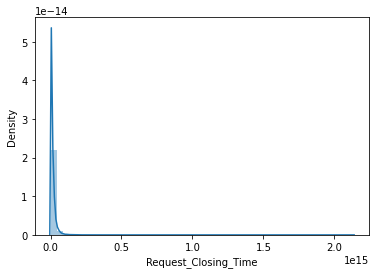

In [37]:
sns.distplot(NYC['Request_Closing_Time'])

In [49]:
print("Total Number of Concerns : ",len(NYC),"\n")
print("Percentage of Requests took less than 100 hour to get solved  : ",round((len(NYC)-(NYC["Request_Closing_Time_min"]>100).sum())/len(NYC)*100,2),"%")
print("Percentage of Requests took less than 1000 hour to get solved : ",round((len(NYC)-(NYC["Request_Closing_Time_min"]>1000).sum())/len(NYC)*100,2),"%")

Total Number of Concerns :  298534 

Percentage of Requests took less than 100 hour to get solved  :  32.84 %
Percentage of Requests took less than 1000 hour to get solved :  97.17 %


In [128]:
print(NYC["Request_Closing_Time_min"].mean())
print(NYC["Request_Closing_Time_min"].std())

258.86387971442474
365.36903056428025


### Coclusion 4: Clearly data have lot of outliers as it is rightly skewed and about 97% of problems are solved in less than 1000 hours i.e. in less than 41 days and on an average it took 259 hours or 11 days 

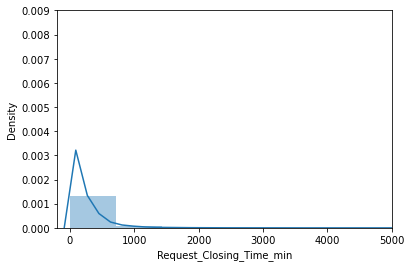

In [39]:
sns.distplot(NYC["Request_Closing_Time_min"])
plt.xlim((-200,5000))
plt.ylim((0,0.009))
plt.show()

In [40]:
NYC2=NYC.loc[:,['Complaint Type','Request_Closing_Time_min']]
NYC2.head(5).sort_values('Request_Closing_Time_min')

,Complaint Type,Request_Closing_Time_min
0,Noise - Street/Sidewalk,55.250000
1,Blocked Driveway,86.266667
4,Illegal Parking,207.033333
2,Blocked Driveway,291.516667
3,Illegal Parking,465.233333


In [41]:
NYC3=NYC.groupby('Complaint Type')['Request_Closing_Time_min'].mean().fillna(0).to_frame()
NYC3.sort_values('Request_Closing_Time_min')

,Request_Closing_Time_min
Complaint Type,
Posting Advertisement,118.548200
Illegal Fireworks,165.668353
Noise - Commercial,188.829266
Noise - House of Worship,191.597901
Noise - Park,204.643950
Noise - Street/Sidewalk,206.713445
Traffic,206.920867
Disorderly Youth,213.515035
Noise - Vehicle,215.339604


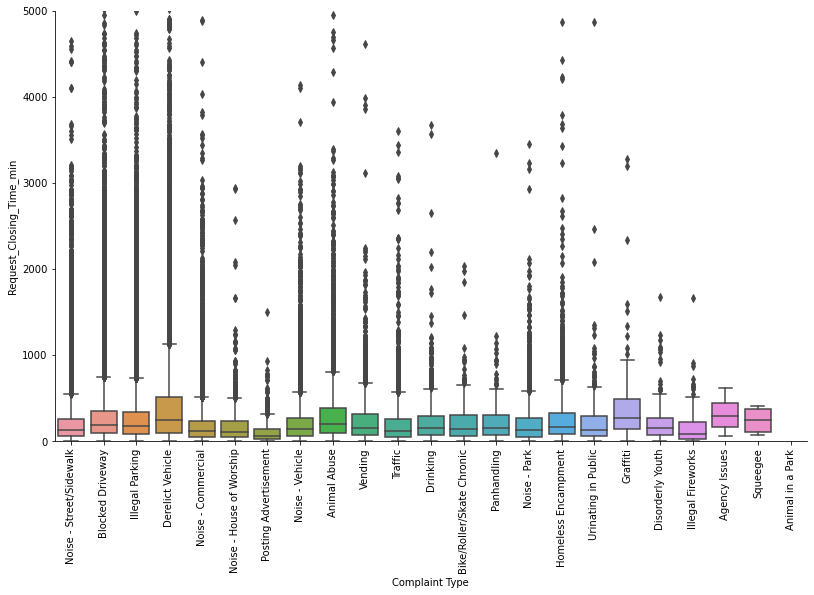

In [104]:
g=sns.catplot(x='Complaint Type', y="Request_Closing_Time_min",kind='box',data=NYC2)
g.fig.set_figwidth(15)
g.fig.set_figheight(7)
plt.xticks(rotation=90)
plt.ylim((0,5000))
plt.show()

###  Conclusion 5:  Posting advertisement took minimum average response time to get close

###  Checking City types coming under Borough 

In [105]:
NYC.isnull().sum()/len(NYC)*100

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.000000
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.979339
Location Type                       0.042876
Incident Zip                        0.169830
Incident Address                   14.871673
Street Name                        14.871673
Cross Street 1                     15.932189
Cross Street 2                     15.962336
Intersection Street 1              85.448894
Intersection Street 2              85.477701
Address Type                        0.236824
City                                0.169495
Landmark                           99.883095
Facility Type                       0.005025
Status                              0.000000
Due Date                            0.000335
Resolution Description              0.000000
Resolution

In [137]:
NYC.loc[:,['Borough']]

,Borough
0,MANHATTAN
1,QUEENS
2,BRONX
3,BRONX
4,QUEENS
...,...
300692,MANHATTAN
300694,QUEENS
300695,BROOKLYN
300696,BRONX


In [139]:
NYC['Borough'].value_counts()

BROOKLYN         98295
QUEENS           80629
MANHATTAN        66109
BRONX            40697
STATEN ISLAND    12338
Unspecified        466
Name: Borough, dtype: int64

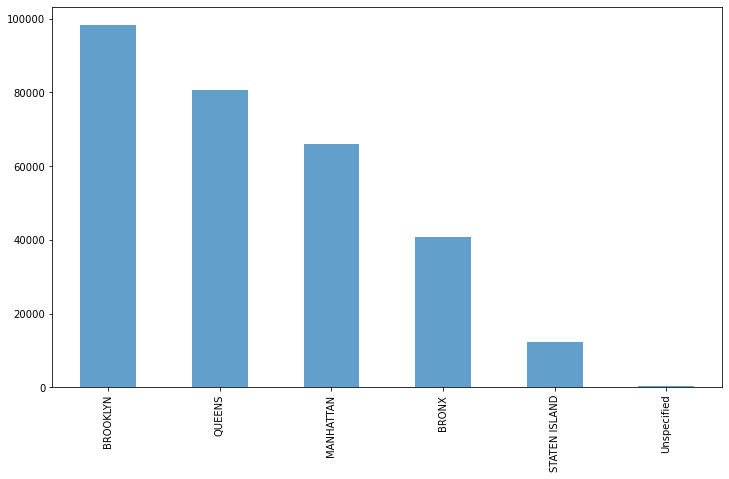

In [108]:
plt.figure(figsize=(12,7))
NYC['Borough'].value_counts().plot(kind='bar',alpha=0.7)
plt.show()

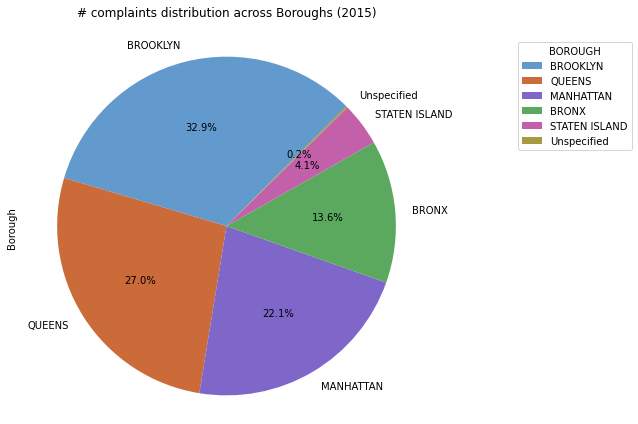

In [114]:
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
NYC['Borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=45, shadow=False , colors = colors,figsize = (10,6))
plt.legend(title='BOROUGH', loc='upper right', bbox_to_anchor=(1.5,1))
plt.axis('equal')
plt.title('# complaints distribution across Boroughs (2015)\n')
plt.tight_layout()
plt.show()

### Conclusion 6: Borough has maximum complaint from Brooklyn and minimum from Saten Island

### To Group the complaint type and borough based on Request Closing time in minutes and take a visualized look of the data, based on a particular location and what type and number of complaints occur at 

In [115]:
NYCGRP = NYC.groupby(['Complaint Type','Borough'])[['Request_Closing_Time_min']].mean().fillna(0).unstack()
NYCGRP.head()

Request_Closing_Time_min                          \
Borough                                      BRONX    BROOKLYN   MANHATTAN   
Complaint Type                                                               
Agency Issues                                  NaN         NaN         NaN   
Animal Abuse                            440.129670  289.950362  221.109082   
Animal in a Park                               NaN         NaN         NaN   
Bike/Roller/Skate Chronic               207.538333  300.282282  173.533481   
Blocked Driveway                        375.705840  264.647022  213.446226   

                                                                   
Borough                        QUEENS STATEN ISLAND   Unspecified  
Complaint Type                                                     
Agency Issues                     NaN           NaN    315.619444  
Animal Abuse               324.833271    298.170347    204.583333  
Animal in a Park                  NaN           NaN  20210.083333  
Bike/Roller/Skate Chronic  286.033333    244.642857    351.600000  
Blocked Driveway           272.256521    244.275218    507.980117

### to visualize the top 5 complaints in each borough using subplots 

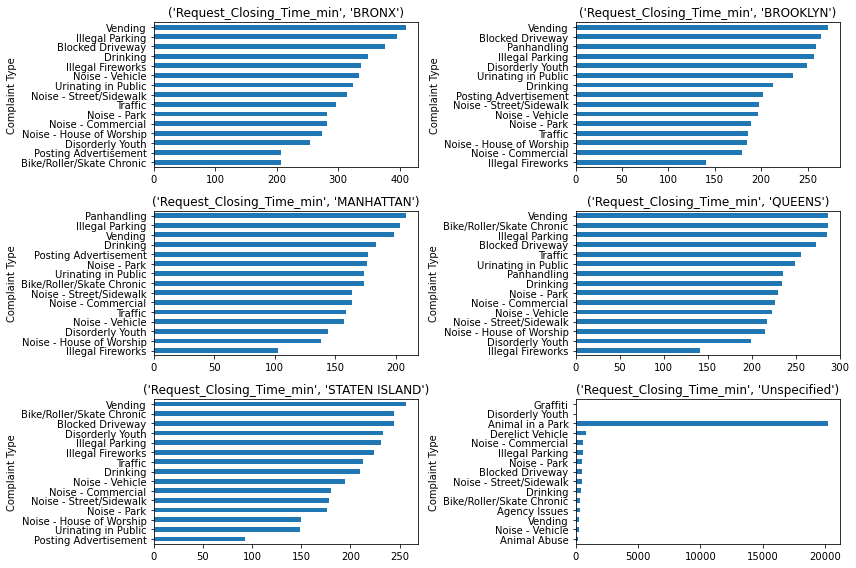

In [142]:
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,8))

for i, (label,col) in enumerate(NYCGRP.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

In [117]:
#Percentage of cases in Borough
for x in NYC["Borough"].unique():
    print("Percentage of Request from ",x," Division : ",round((NYC["Borough"]==x).sum()/len(NYC)*100,2))

Percentage of Request from  MANHATTAN  Division :  22.14
Percentage of Request from  QUEENS  Division :  27.01
Percentage of Request from  BRONX  Division :  13.63
Percentage of Request from  BROOKLYN  Division :  32.93
Percentage of Request from  Unspecified  Division :  0.16
Percentage of Request from  STATEN ISLAND  Division :  4.13


In [118]:
#Unique Location Types
NYC["Location Type"].unique()

array(['Street/Sidewalk', 'Club/Bar/Restaurant', 'Store/Commercial',
       'House of Worship', 'Residential Building/House',
       'Residential Building', 'Park/Playground', 'Vacant Lot',
       'House and Store', 'Highway', 'Commercial', 'Roadway Tunnel',
       'Subway Station', 'Parking Lot', 'Bridge', nan, 'Park'],
      dtype=object)

In [119]:
#Request Closing Time for all location Type sorted in ascending Order
pd.DataFrame(NYC.groupby("Location Type")["Request_Closing_Time_min"].mean()).sort_values("Request_Closing_Time_min")

,Request_Closing_Time_min
Location Type,
Subway Station,142.250980
Club/Bar/Restaurant,186.074330
House of Worship,191.833279
Store/Commercial,198.089073
Park/Playground,207.137129
Highway,223.424221
Bridge,229.158333
Roadway Tunnel,266.525714
Street/Sidewalk,268.515306


In [120]:
#Request Closing Time for all City Type sorted in ascending Order
pd.DataFrame(NYC.groupby("City")["Request_Closing_Time_min"].mean()).sort_values("Request_Closing_Time_min")

,Request_Closing_Time_min
City,
Arverne,135.895606
Rockaway Park,139.133736
Little Neck,154.660316
Oakland Gardens,157.853146
Bayside,160.759992
Far Rockaway,167.399774
New York,178.357371
Flushing,181.081826
Forest Hills,193.449032


### Conclusion 7: Arverne has minimum average request closing time

In [121]:
#Percentage Of Missing Value
pd.DataFrame((NYC.isnull().sum()/NYC.shape[0]*100)).sort_values(0,ascending=False)[:10]

,0
Ferry Terminal Name,100.000000
Ferry Direction,100.000000
Road Ramp,99.928651
Bridge Highway Segment,99.928651
Bridge Highway Name,99.918602
Bridge Highway Direction,99.918602
Landmark,99.883095
Intersection Street 2,85.477701
Intersection Street 1,85.448894
Cross Street 2,15.962336


In [122]:
#Remove the column with very high percentage of missing value
new_NYC=NYC.loc[:,(NYC.isnull().sum()/NYC.shape[0]*100)<=50]
print("Old DataFrame Shape :",NYC.shape)
print("New DataFrame Shape : ",new_NYC.shape)

Old DataFrame Shape : (298534, 50)
New DataFrame Shape :  (298534, 41)


In [123]:
rem=[]
for x in new_NYC.columns.tolist():
    if new_NYC[x].nunique()<=3:
        print(x+ " "*10+" : ",new_NYC[x].unique())
        rem.append(x)

Agency           :  ['NYPD']
Agency Name           :  ['New York City Police Department' 'NYPD' 'Internal Affairs Bureau']
Facility Type           :  ['Precinct' nan]
Park Facility Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Number           :  ['Unspecified' 'Q001']
School Region           :  ['Unspecified' nan]
School Code           :  ['Unspecified' nan]
School Phone Number           :  ['Unspecified' '7182176034']
School Address           :  ['Unspecified' 'Grand Central Parkway, near the soccer field']
School City           :  ['Unspecified' 'QUEENS']
School State           :  ['Unspecified' 'NY']
School Zip           :  ['Unspecified' nan]
School Not Found           :  ['N']


### Here not all the data above give us much details, and  are Unspecified. So we can remove those columns to ease our analysis 

In [124]:
new_NYC.drop(rem,axis=1,inplace=True)

In [73]:
new_NYC.shape

(298534, 27)

In [74]:
#Remove columns that are not needed for our analysis
rem=["Unique Key","Incident Address","Descriptor","Street Name","Cross Street 1","Cross Street 2","Due Date","Resolution Description","Resolution Action Updated Date","Community Board","X Coordinate (State Plane)","Y Coordinate (State Plane)","Park Borough","Latitude","Longitude","Location"]

new_NYC.drop(rem,axis=1,inplace=True)
new_NYC.head()

,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Address Type,City,Status,Borough,Request_Closing_Time,Request_Closing_Time_min
0,2015-12-31 23:59:45,2016-01-01 00:55:00,Noise - Street/Sidewalk,Street/Sidewalk,10034.0,ADDRESS,New York,Closed,MANHATTAN,0 days 00:55:15,55.250000
1,2015-12-31 23:59:44,2016-01-01 01:26:00,Blocked Driveway,Street/Sidewalk,11105.0,ADDRESS,Astoria,Closed,QUEENS,0 days 01:26:16,86.266667
2,2015-12-31 23:59:29,2016-01-01 04:51:00,Blocked Driveway,Street/Sidewalk,10458.0,ADDRESS,Bronx,Closed,BRONX,0 days 04:51:31,291.516667
3,2015-12-31 23:57:46,2016-01-01 07:43:00,Illegal Parking,Street/Sidewalk,10461.0,ADDRESS,Bronx,Closed,BRONX,0 days 07:45:14,465.233333
4,2015-12-31 23:56:58,2016-01-01 03:24:00,Illegal Parking,Street/Sidewalk,11373.0,ADDRESS,Elmhurst,Closed,QUEENS,0 days 03:27:02,207.033333


### Hypothesis Testing

In [76]:
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Hypothesis test no. 1

### H0: there is no significant difference in mean of Request_Closing_Time for different Complaint.   H1:there is signficant difference in mean of Request_Closing_Time for different Complaint

In [78]:
anova_NYC=pd.DataFrame()
anova_NYC["Request_Closing_Time_min"]=new_NYC["Request_Closing_Time_min"]
anova_NYC["Complaint"]=new_NYC["Complaint Type"]

anova_NYC.dropna(inplace=True)
anova_NYC.head()

,Request_Closing_Time_min,Complaint
0,55.250000,Noise - Street/Sidewalk
1,86.266667,Blocked Driveway
2,291.516667,Blocked Driveway
3,465.233333,Illegal Parking
4,207.033333,Illegal Parking


In [79]:
lm=ols("Request_Closing_Time_min~Complaint",data=anova_NYC).fit()
table=sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Complaint,22.0,1.455049e+09,6.613860e+07,514.177089,0.0
Residual,298511.0,3.839747e+10,1.286300e+05,NaN,NaN


### Since p value for the Complaint is less that 0.01 thus we accept alternate hypothesis i.e there is significant difference in the mean response time w.r.t different type of complaint. 

### Hypothesis test no. 2

### H0:Complaint Type and Location Type are independent  H1:Complaint Type and Location Type are related 

In [81]:
chi_sq=pd.DataFrame()
chi_sq["Location Type"]=new_NYC["Location Type"]
chi_sq["Complaint Type"]=new_NYC["Complaint Type"]

chi_sq.dropna(inplace=True)

In [82]:
data_crosstab = pd.crosstab( chi_sq["Location Type"],chi_sq["Complaint Type"])

In [84]:
stat, p, dof, expected = chi2_contingency(data_crosstab) 

alpha = 0.05
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

Dependent (reject H0)


### Conclusions 

###### 1. Major complaints  are from Transport department namely Blocked Driveway, Illegal Parking, Noise- Street/Sidewalk, Noise Commercial, Derelict Vehicle.

##### 2.  Major Complaint are from Brooklyn, New York, and Bronx

##### 3.  Almost 98% of the tickets are closed

##### 4.  About 97% of problems are solved in less than 1000 hours i.e. in less than 41 days and on an average it took 259 hours or 11 days

##### 5.  Posting advertisement took minimum average response time to get close

##### 6.  Borough has maximum complaint from Brooklyn and minimum from Saten Island

##### 7.  Arverne has minimum average request closing time

##### 8. There is a significant difference in the mean response time w.r.t different type of complaint.

##### 9. Complaint Type and Location Type are related 